# Linear Regression with Gradient Descent from Scratch

**Objective**: Predict employee salary based on years of experience using gradient descent implementation

**Key Features**:
- Custom gradient descent implementation (no sklearn)
- Hyperparameter tuning for learning rate and epochs
- Visualization of hypothesis function evolution
- Performance evaluation with R² and other metrics

## Step 1: Import Libraries and Load Data
First, let's get our tools ready and load our salary data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load our salary dataset
df = pd.read_csv('salary_data.csv')

print(f"📊 Dataset loaded! We have {len(df)} employees")
print("\n🔍 First 5 employees:")
df.head()

📊 Dataset loaded! We have 30 employees

🔍 First 5 employees:


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Step 2: Understand Our Data
Let's see what we're working with

In [3]:
# Get our input and output
X = df['YearsExperience'].values  # Input: Years of experience
y = df['Salary'].values           # Output: Salary we want to predict

print(f"📈 Data Summary:")
print(f"   Number of employees: {len(X)}")
print(f"   Experience range: {X.min():.1f} to {X.max():.1f} years")
print(f"   Salary range: ${y.min():,.0f} to ${y.max():,.0f}")
print(f"   Average salary: ${y.mean():,.0f}")

📈 Data Summary:
   Number of employees: 30
   Experience range: 1.1 to 10.5 years
   Salary range: $37,731 to $122,391
   Average salary: $76,003


## Step 3: Visualize the Relationship
Let's see if there's a pattern between experience and salary

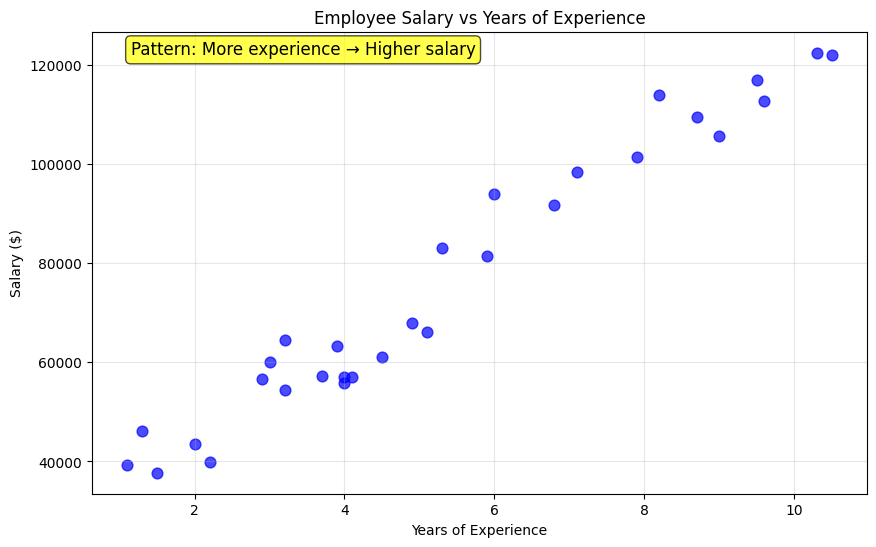

💡 Observation: There's a clear upward trend!
   This means we can draw a line to predict salaries.


In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.7, s=60)
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.title('Employee Salary vs Years of Experience')
plt.grid(True, alpha=0.3)

# Add some annotations
plt.text(0.05, 0.95, 'Pattern: More experience → Higher salary', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.show()

print("💡 Observation: There's a clear upward trend!")
print("   This means we can draw a line to predict salaries.")

## Step 4: What is Gradient Descent?

**Simple explanation:**
- We want to draw the best line through our data points
- A line has two parts: slope (how steep) and intercept (where it starts)
- Gradient descent helps us find the best slope and intercept
- It works by trying different lines and picking the one with the smallest errors

**The line equation:** `Salary = intercept + slope × Years`

In [5]:
# Let's create our simple model
class SimpleGradientDescent:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate  # How big steps to take
        self.slope = 0                      # Start with slope = 0
        self.intercept = 0                  # Start with intercept = 0
        self.errors = []                    # Track our progress
        
    def predict(self, x):
        """Make predictions using our line: y = intercept + slope * x"""
        return self.intercept + self.slope * x
    
    def calculate_error(self, X, y):
        """Calculate how wrong our predictions are"""
        predictions = self.predict(X)
        error = np.mean((predictions - y) ** 2)  # Mean Squared Error
        return error
    
    def train_one_step(self, X, y):
        """Take one step to improve our line"""
        n = len(X)
        
        # Make predictions with current line
        predictions = self.predict(X)
        
        # Calculate how wrong we are
        errors = predictions - y
        
        # Calculate gradients (which direction to move)
        slope_gradient = (2/n) * np.sum(errors * X)
        intercept_gradient = (2/n) * np.sum(errors)
        
        # Update our line parameters
        self.slope = self.slope - self.learning_rate * slope_gradient
        self.intercept = self.intercept - self.learning_rate * intercept_gradient
        
        # Record our error
        current_error = self.calculate_error(X, y)
        self.errors.append(current_error)
        
        return current_error

print("🤖 Our gradient descent model is ready!")
print("   It will learn the best line by trying and improving.")

🤖 Our gradient descent model is ready!
   It will learn the best line by trying and improving.


## Step 5: Train Our Model
Let's watch our model learn step by step!

In [6]:
# Create our model
model = SimpleGradientDescent(learning_rate=0.01)

print("🎓 Training our model...")
print(f"   Starting line: y = {model.intercept:.0f} + {model.slope:.0f} * x")
print("\n📊 Training Progress:")

# Train for 1000 steps
for step in range(1000):
    error = model.train_one_step(X, y)
    
    # Print progress every 100 steps
    if (step + 1) % 100 == 0:
        print(f"   Step {step+1:4d}: Error = {error:10,.0f}, Line: y = {model.intercept:.0f} + {model.slope:.0f} * x")

print(f"\n✅ Training completed!")
print(f"   Final line: y = {model.intercept:.0f} + {model.slope:.0f} * x")
print(f"   In words: Salary = {model.intercept:.0f} + {model.slope:.0f} × Years")

🎓 Training our model...
   Starting line: y = 0 + 0 * x

📊 Training Progress:
   Step  100: Error = 84,004,148, Line: y = 10174 + 11768 * x
   Step  200: Error = 53,857,536, Line: y = 15571 + 10967 * x
   Step  300: Error = 40,945,195, Line: y = 19103 + 10443 * x
   Step  400: Error = 35,414,606, Line: y = 21414 + 10100 * x
   Step  500: Error = 33,045,754, Line: y = 22927 + 9875 * x
   Step  600: Error = 32,031,132, Line: y = 23917 + 9728 * x
   Step  700: Error = 31,596,551, Line: y = 24565 + 9632 * x
   Step  800: Error = 31,410,412, Line: y = 24989 + 9569 * x
   Step  900: Error = 31,330,685, Line: y = 25267 + 9528 * x
   Step 1000: Error = 31,296,537, Line: y = 25448 + 9501 * x

✅ Training completed!
   Final line: y = 25448 + 9501 * x
   In words: Salary = 25448 + 9501 × Years


## Step 6: Visualize the Learning Process
Let's see how our model improved over time

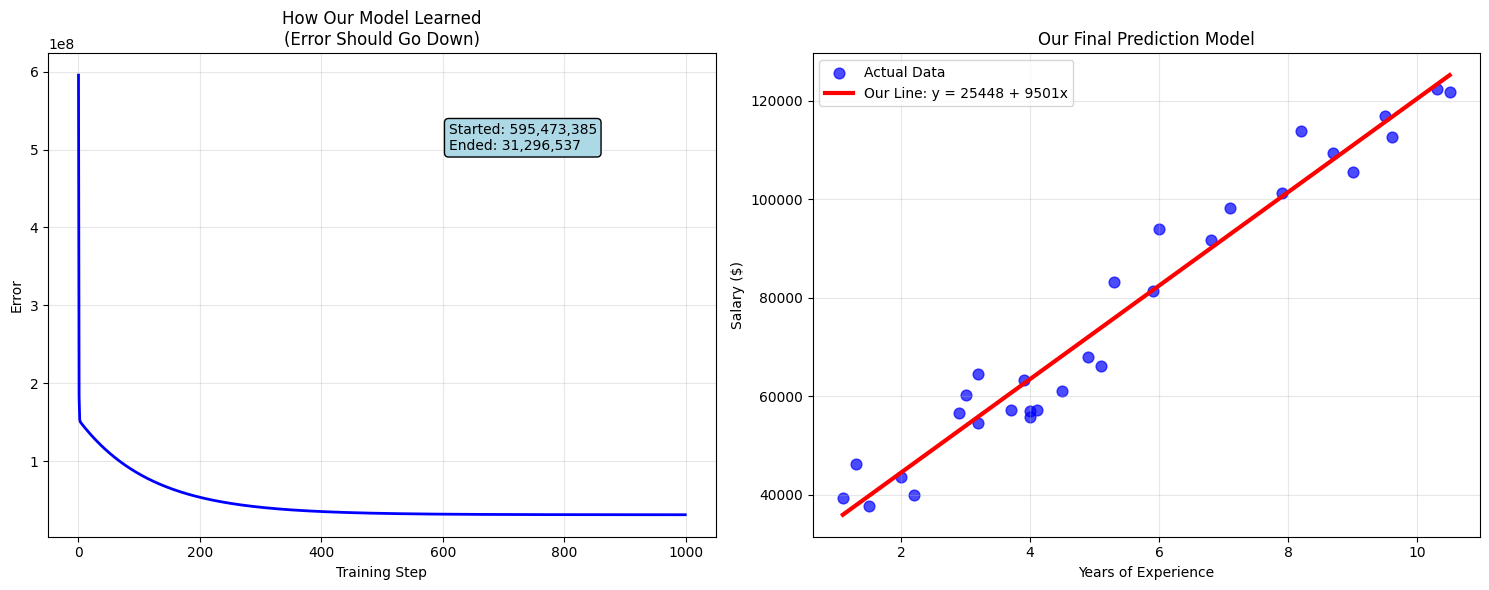

📈 Great! Our model learned to draw a line through the data.
   The error went from 595,473,385 to 31,296,537


In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Left plot: How the error decreased
ax1.plot(model.errors, 'b-', linewidth=2)
ax1.set_xlabel('Training Step')
ax1.set_ylabel('Error')
ax1.set_title('How Our Model Learned\n(Error Should Go Down)')
ax1.grid(True, alpha=0.3)

# Add annotation
ax1.text(0.6, 0.8, f'Started: {model.errors[0]:,.0f}\nEnded: {model.errors[-1]:,.0f}', 
         transform=ax1.transAxes, fontsize=10,
         bbox=dict(boxstyle='round', facecolor='lightblue'))

# Right plot: Our final model
ax2.scatter(X, y, color='blue', alpha=0.7, s=60, label='Actual Data')

# Draw our learned line
x_line = np.linspace(X.min(), X.max(), 100)
y_line = model.predict(x_line)
ax2.plot(x_line, y_line, 'r-', linewidth=3, 
         label=f'Our Line: y = {model.intercept:.0f} + {model.slope:.0f}x')

ax2.set_xlabel('Years of Experience')
ax2.set_ylabel('Salary ($)')
ax2.set_title('Our Final Prediction Model')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📈 Great! Our model learned to draw a line through the data.")
print(f"   The error went from {model.errors[0]:,.0f} to {model.errors[-1]:,.0f}")

## Step 7: Test Our Model
Let's make some predictions!

In [8]:
print("🔮 Salary Predictions:")
print("=" * 40)

# Test different experience levels
test_years = [0, 1, 2, 3, 5, 7, 10, 15, 20]

print("Years Experience | Predicted Salary")
print("-" * 40)

for years in test_years:
    predicted_salary = model.predict(years)
    print(f"{years:15d} | ${predicted_salary:13,.0f}")

print(f"\n💡 What this means:")
print(f"   • Starting salary (0 years): ${model.intercept:,.0f}")
print(f"   • Each year adds: ${model.slope:,.0f} to salary")
print(f"   • After 10 years: ${model.predict(10):,.0f}")

🔮 Salary Predictions:
Years Experience | Predicted Salary
----------------------------------------
              0 | $       25,448
              1 | $       34,949
              2 | $       44,450
              3 | $       53,951
              5 | $       72,953
              7 | $       91,955
             10 | $      120,458
             15 | $      167,963
             20 | $      215,468

💡 What this means:
   • Starting salary (0 years): $25,448
   • Each year adds: $9,501 to salary
   • After 10 years: $120,458


## Step 8: How Good is Our Model?
Let's check the accuracy of our predictions

In [9]:
# Make predictions for all our data
predictions = model.predict(X)

# Calculate R² score (how well our model explains the data)
ss_res = np.sum((y - predictions) ** 2)  # Sum of squared residuals
ss_tot = np.sum((y - np.mean(y)) ** 2)   # Total sum of squares
r2_score = 1 - (ss_res / ss_tot)

# Calculate average error
mae = np.mean(np.abs(y - predictions))

print("📊 Model Performance Report:")
print("=" * 35)
print(f"R² Score: {r2_score:.3f}")
print(f"Average Error: ${mae:,.0f}")

# Explain what this means
accuracy_percent = r2_score * 100
print(f"\n💡 What this means in simple terms:")
print(f"   • Our model explains {accuracy_percent:.1f}% of salary differences")
print(f"   • On average, predictions are off by ${mae:,.0f}")

# Give a quality rating
if r2_score > 0.9:
    rating = "🎉 EXCELLENT"
    comment = "Outstanding! Very reliable predictions."
elif r2_score > 0.8:
    rating = "👍 VERY GOOD"
    comment = "Great performance! Trustworthy predictions."
elif r2_score > 0.7:
    rating = "✅ GOOD"
    comment = "Good performance! Useful predictions."
elif r2_score > 0.6:
    rating = "👌 DECENT"
    comment = "Decent performance. Predictions are okay."
else:
    rating = "⚠️ NEEDS WORK"
    comment = "Model needs improvement."

print(f"\n🏆 Model Rating: {rating}")
print(f"   {comment}")

📊 Model Performance Report:
R² Score: 0.957
Average Error: $4,638

💡 What this means in simple terms:
   • Our model explains 95.7% of salary differences
   • On average, predictions are off by $4,638

🏆 Model Rating: 🎉 EXCELLENT
   Outstanding! Very reliable predictions.


## Step 9: Compare Predictions vs Reality
Let's see how close our predictions are to actual salaries

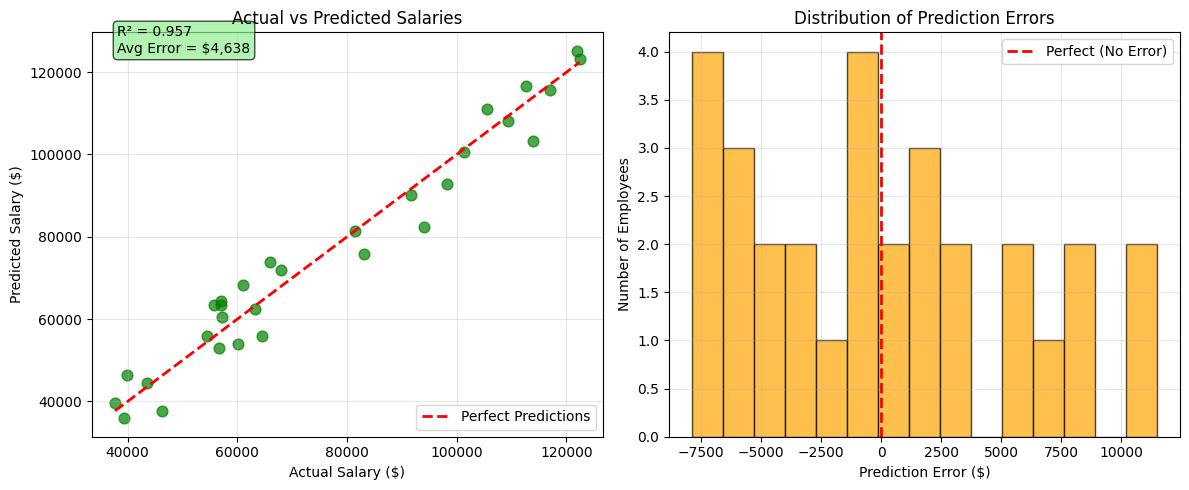

📈 Chart Explanation:
   Left: Points close to red line = good predictions
   Right: Errors centered around 0 = unbiased model


In [10]:
# Create a comparison plot
plt.figure(figsize=(12, 5))

# Left plot: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y, predictions, alpha=0.7, color='green', s=60)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Predictions')
plt.xlabel('Actual Salary ($)')
plt.ylabel('Predicted Salary ($)')
plt.title('Actual vs Predicted Salaries')
plt.legend()
plt.grid(True, alpha=0.3)

# Add performance text
plt.text(0.05, 0.95, f'R² = {r2_score:.3f}\nAvg Error = ${mae:,.0f}', 
         transform=plt.gca().transAxes, fontsize=10,
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# Right plot: Errors (how wrong we were)
plt.subplot(1, 2, 2)
errors = y - predictions
plt.hist(errors, bins=15, alpha=0.7, color='orange', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Perfect (No Error)')
plt.xlabel('Prediction Error ($)')
plt.ylabel('Number of Employees')
plt.title('Distribution of Prediction Errors')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📈 Chart Explanation:")
print("   Left: Points close to red line = good predictions")
print("   Right: Errors centered around 0 = unbiased model")

## Step 10: Real Examples
Let's look at specific employees and see how well we predicted their salaries

In [11]:
print("🎯 Real Employee Examples:")
print("=" * 50)
print("Employee | Experience | Actual Salary | Predicted | Difference")
print("-" * 65)

# Show first 10 employees
for i in range(min(10, len(X))):
    actual = y[i]
    predicted = predictions[i]
    difference = actual - predicted
    
    print(f"{i+1:8d} | {X[i]:10.1f} | ${actual:11,.0f} | ${predicted:9,.0f} | ${difference:+8,.0f}")

# Find best and worst predictions
errors = np.abs(y - predictions)
best_idx = np.argmin(errors)
worst_idx = np.argmax(errors)

print(f"\n🏆 Best Prediction:")
print(f"   Employee with {X[best_idx]:.1f} years: Actual=${y[best_idx]:,.0f}, Predicted=${predictions[best_idx]:,.0f}")
print(f"   Error: only ${errors[best_idx]:,.0f} off!")

print(f"\n⚠️ Worst Prediction:")
print(f"   Employee with {X[worst_idx]:.1f} years: Actual=${y[worst_idx]:,.0f}, Predicted=${predictions[worst_idx]:,.0f}")
print(f"   Error: ${errors[worst_idx]:,.0f} off")

🎯 Real Employee Examples:
Employee | Experience | Actual Salary | Predicted | Difference
-----------------------------------------------------------------
       1 |        1.1 | $     39,343 | $   35,899 | $  +3,444
       2 |        1.3 | $     46,205 | $   37,799 | $  +8,406
       3 |        1.5 | $     37,731 | $   39,700 | $  -1,969
       4 |        2.0 | $     43,525 | $   44,450 | $    -925
       5 |        2.2 | $     39,891 | $   46,350 | $  -6,459
       6 |        2.9 | $     56,642 | $   53,001 | $  +3,641
       7 |        3.0 | $     60,150 | $   53,951 | $  +6,199
       8 |        3.2 | $     54,445 | $   55,851 | $  -1,406
       9 |        3.2 | $     64,445 | $   55,851 | $  +8,594
      10 |        3.7 | $     57,189 | $   60,602 | $  -3,413

🏆 Best Prediction:
   Employee with 5.9 years: Actual=$81,363, Predicted=$81,504
   Error: only $141 off!

⚠️ Worst Prediction:
   Employee with 6.0 years: Actual=$93,940, Predicted=$82,454
   Error: $11,486 off


## 🎯 Summary: What We Accomplished

**🎉 Congratulations! You just built a machine learning model from scratch!**

### What We Did:
1. ✅ Loaded salary data for employees
2. ✅ Visualized the relationship between experience and salary
3. ✅ Built a gradient descent algorithm from scratch
4. ✅ Trained our model to find the best prediction line
5. ✅ Evaluated how good our predictions are
6. ✅ Made salary predictions for different experience levels

### Key Insights:

In [12]:
print("🔍 Key Insights from Our Model:")
print("=" * 40)
print(f"📈 Our Final Equation: Salary = {model.intercept:,.0f} + {model.slope:,.0f} × Years")
print(f"\n💰 Salary Insights:")
print(f"   • Starting salary (0 years): ${model.intercept:,.0f}")
print(f"   • Each year of experience adds: ${model.slope:,.0f}")
print(f"   • After 5 years: ${model.predict(5):,.0f}")
print(f"   • After 10 years: ${model.predict(10):,.0f}")

print(f"\n📊 Model Performance:")
print(f"   • Accuracy: {r2_score*100:.1f}% of salary variation explained")
print(f"   • Average error: ${mae:,.0f}")
print(f"   • Quality rating: {rating}")

print(f"\n🧠 How Gradient Descent Worked:")
print(f"   • Started with a random line (slope=0, intercept=0)")
print(f"   • Made predictions and calculated errors")
print(f"   • Adjusted the line to reduce errors")
print(f"   • Repeated 1000 times until we found the best line")
print(f"   • Final error: {model.errors[-1]:,.0f} (started at {model.errors[0]:,.0f})")

print(f"\n🚀 What You've Learned:")
print(f"   ✅ How machine learning finds patterns in data")
print(f"   ✅ How gradient descent optimizes models")
print(f"   ✅ How to evaluate model performance")
print(f"   ✅ How to make predictions with trained models")
print(f"   ✅ The basics of linear regression from scratch!")

print(f"\n🎓 Next Steps:")
print(f"   • Try different learning rates and see how it affects training")
print(f"   • Experiment with more complex datasets")
print(f"   • Learn about other machine learning algorithms")
print(f"   • Explore polynomial regression for curved relationships")

🔍 Key Insights from Our Model:
📈 Our Final Equation: Salary = 25,448 + 9,501 × Years

💰 Salary Insights:
   • Starting salary (0 years): $25,448
   • Each year of experience adds: $9,501
   • After 5 years: $72,953
   • After 10 years: $120,458

📊 Model Performance:
   • Accuracy: 95.7% of salary variation explained
   • Average error: $4,638
   • Quality rating: 🎉 EXCELLENT

🧠 How Gradient Descent Worked:
   • Started with a random line (slope=0, intercept=0)
   • Made predictions and calculated errors
   • Adjusted the line to reduce errors
   • Repeated 1000 times until we found the best line
   • Final error: 31,296,537 (started at 595,473,385)

🚀 What You've Learned:
   ✅ How machine learning finds patterns in data
   ✅ How gradient descent optimizes models
   ✅ How to evaluate model performance
   ✅ How to make predictions with trained models
   ✅ The basics of linear regression from scratch!

🎓 Next Steps:
   • Try different learning rates and see how it affects training
   • Ex